<a href="https://colab.research.google.com/github/yasaswini1212/AI-Driven-Plant-Disease-rediction-and-Management-System/blob/main/plantdis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🌿 AI-DRIVEN CROP DISEASE PREDICTION AND MANAGEMENT SYSTEM**

##**📁 1. Dataset Preparation**

**1.1 Dataset Download
The dataset was downloaded using wget from Mendeley Data, which contains augmented images of plant leaves with different diseases.**

In [ ]:
!wget -O"dataset.zip" "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded"/

--2025-05-22 06:51:16--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded/
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-05-22 06:51:17--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.92.17.194, 3.5.68.213, 3.5.68.126, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.92.17.194|:443...

**1.2 Extract and Explore
The dataset was extracted using the unzip command. It contains folders where each folder represents a different plant disease category.**

In [ ]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

**1.3 Splitting Dataset**
The dataset was split into:
*   Training (80%)
*   Testing  (10%)
*   Validation(10%)

using the splitfolders Python library. This ensures balanced distribution for model training and evaluation.


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/Plant_leave_diseases_dataset_with_augmentation',output="dataset",seed=1337,ratio=(.8,.1,.1))

Copying files: 61486 files [00:13, 4448.62 files/s]


##**🧹 2. Data Preprocessing:**

**2.1 Paths and Parameters
Set image size to 160x160 pixels and batch size to 32. Defined paths for train, validation, and test sets.**

In [ ]:
train_dir = "/content/dataset/train"
validation_dir ="/content/dataset/val"
test_dir="/content/dataset/test"
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 49179 files belonging to 39 classes.


**2.2 Load Datasets
Loaded datasets using TensorFlow's image_dataset_from_directory function, which automatically labels images based on folder names.**

In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 6139 files belonging to 39 classes.
Found 6168 files belonging to 39 classes.


**2.3 Visualize Samples
Plotted a 3x3 grid of sample images from the training set to visually inspect data correctness and quality**

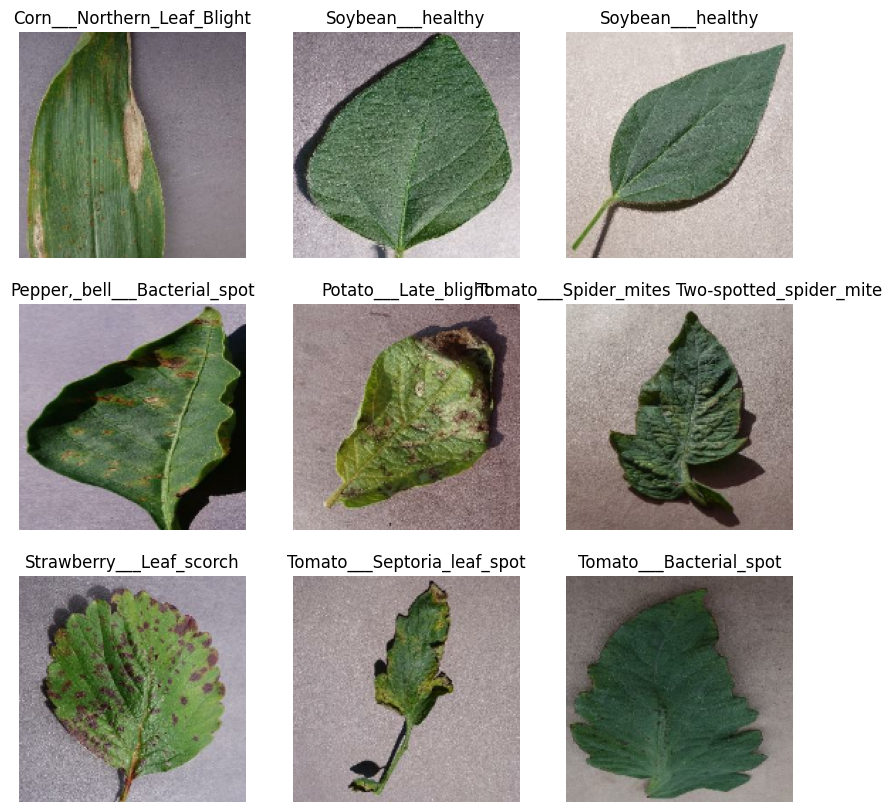

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

**2.4 Prefetch for Performance
Used AUTOTUNE with .prefetch() to efficiently load data during training, improving performance.**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

**2.5 Data Augmentation**
Applied augmentation techniques such as:

Random Horizontal Flip

Random Rotation
This helps reduce overfitting and improves the model’s ability to generalize.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

## **🔍 3. Feature Extraction with Pretrained Model**

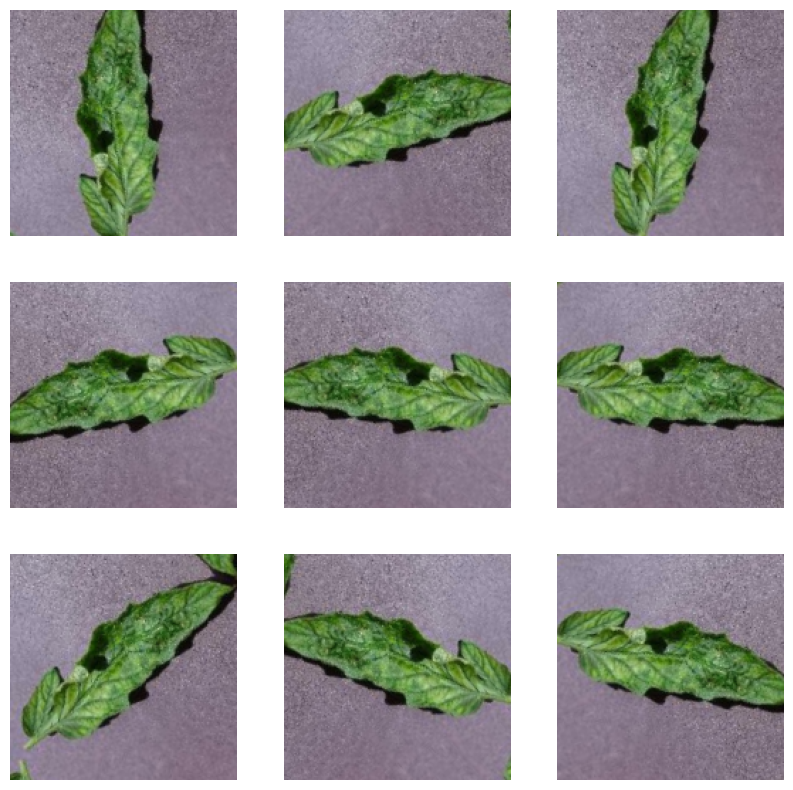

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input =tf.keras.applications.mobilenet_v2.preprocess_input

**3.1 Load MobileNetV2
Used MobileNetV2 from Keras Applications as the base model with ImageNet weights. Removed the top classification layer (include_top=False).**

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model=tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=IMG_SHAPE,
    include_top=False,
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## **Feature extraction**

**3.2 Freeze Base Model
Froze the convolutional layers so that their pretrained weights remain unchanged during initial training.**

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

**3.3 Add Custom Layers**

Added:

GlobalAveragePooling2D() layer to reduce dimensionality.

Dropout(0.2) to prevent overfitting.

Dense layer with sigmoid activation to output probabilities for each disease class.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:

prediction_layer = tf.keras.layers.Dense(len(class_names), activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 39)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        49,959 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,943 (8.80 MB)

 Trainable params: 49,959 (195.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
len(model.trainable_variables)

2

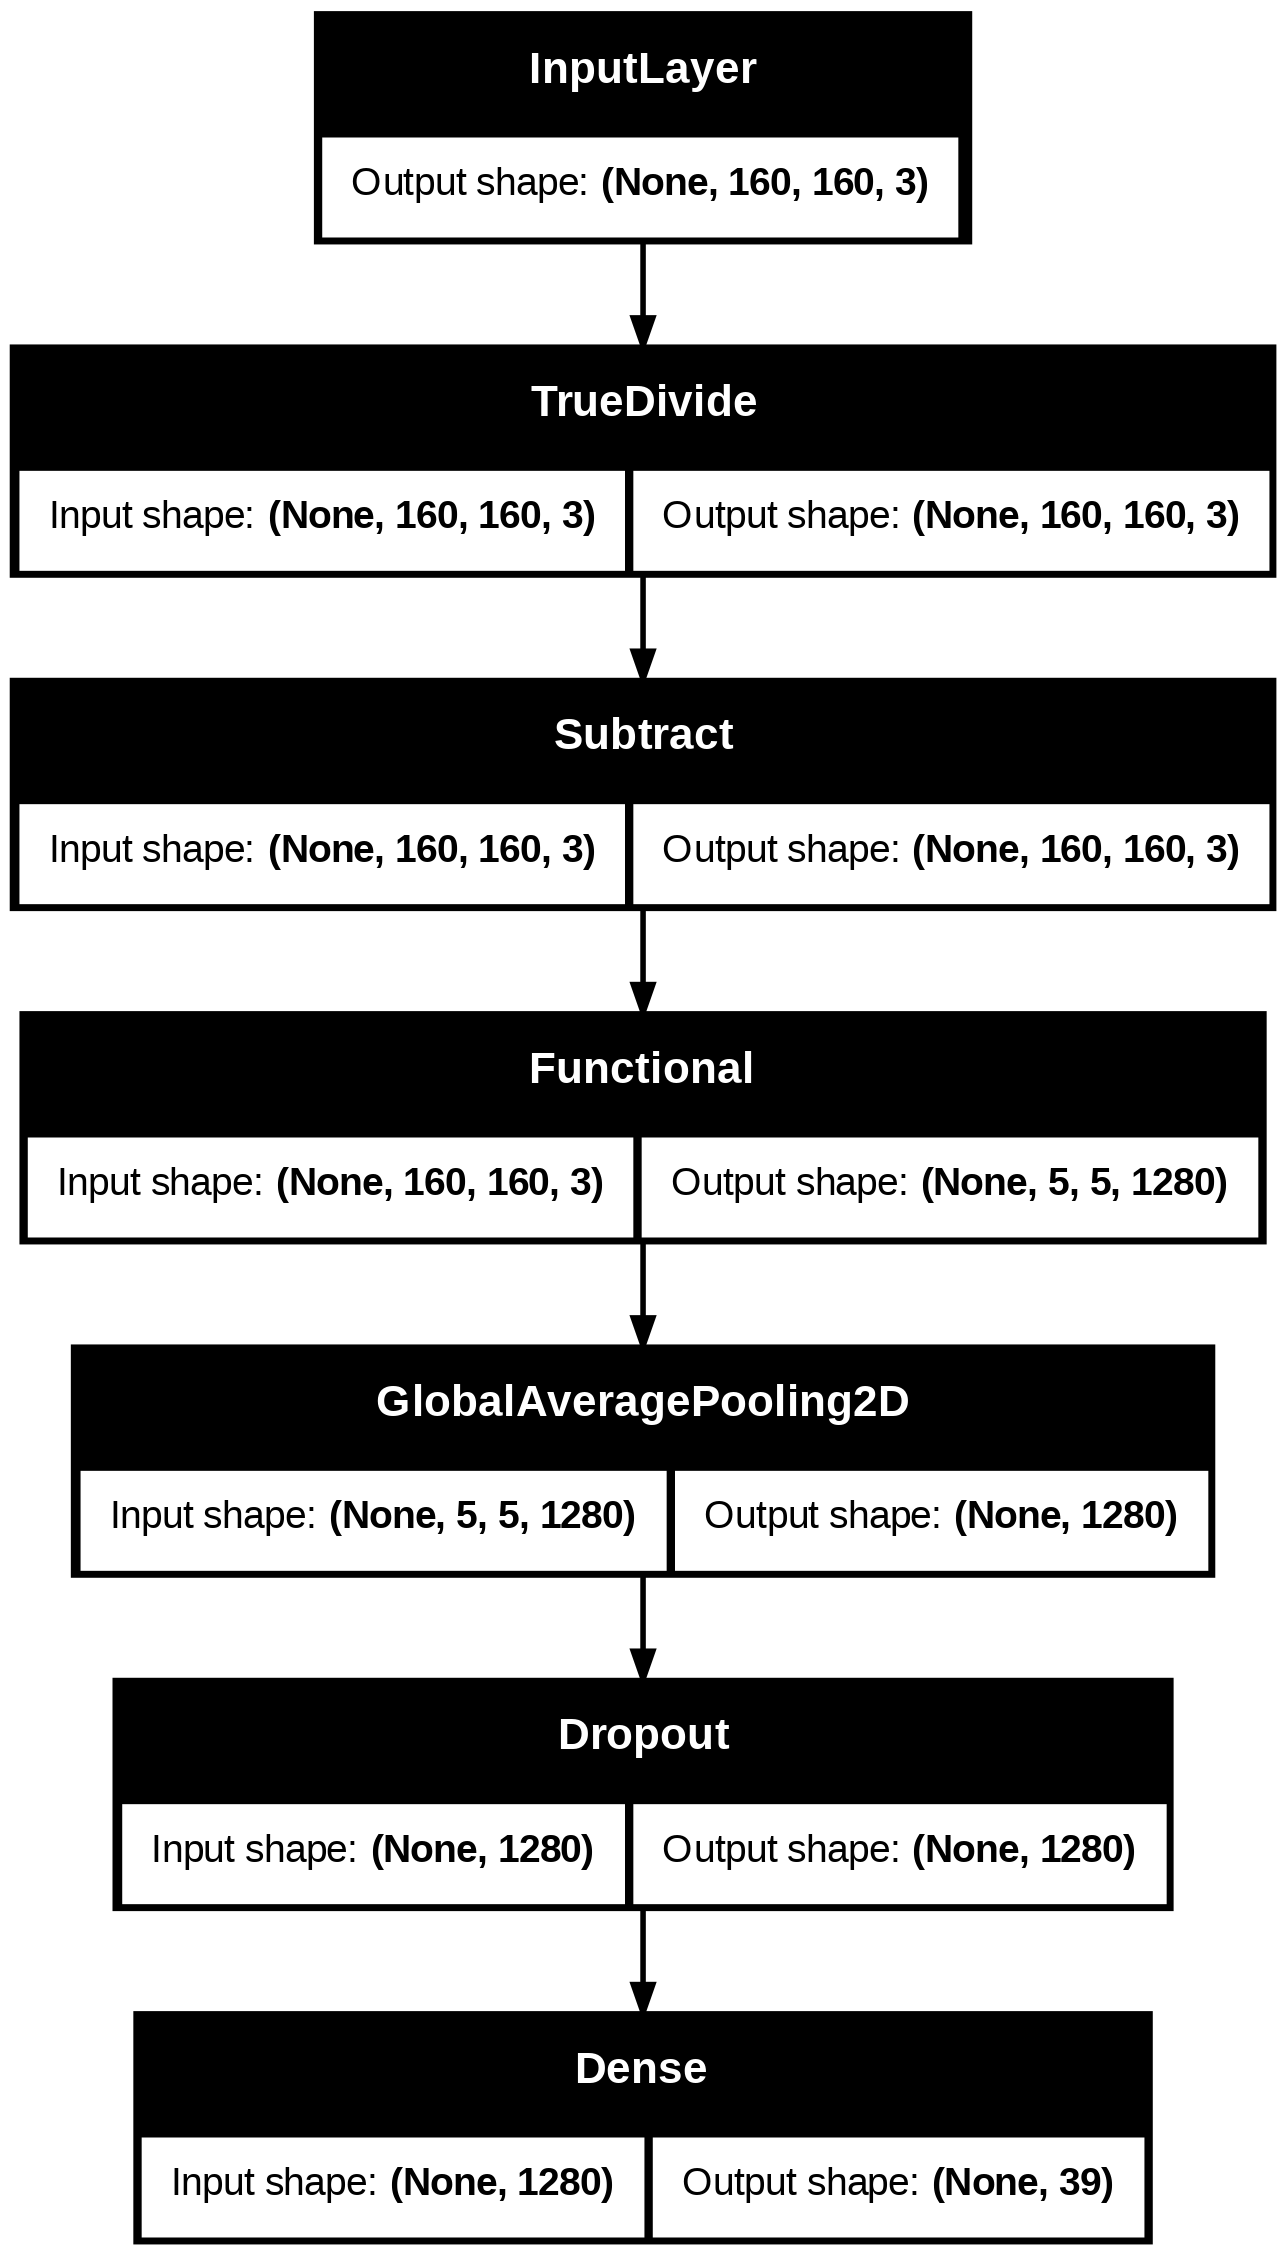

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**3.4 Model Compilation**
Compiled the model using:

Adam optimizer

Sparse Categorical Crossentropy as the loss function

Sparse Categorical Accuracy as the performance metric

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

## **🧪 4. Initial Model Training**

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.0437 - loss: 4.3886


**4.1 Validation Before Training
Evaluated the compiled model on the validation set to establish a baseline loss and accuracy before training.**

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 4.38
initial accuracy: 0.04


**4.2 Train Base Model
Trained the model for 10 epochs with the training and validation datasets. Plotted training and validation accuracy and loss for performance visualization.**

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.7907 - loss: 0.7967 - val_accuracy: 0.9405 - val_loss: 0.1855
Epoch 2/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9475 - loss: 0.1699 - val_accuracy: 0.9583 - val_loss: 0.1374
Epoch 3/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9582 - loss: 0.1298 - val_accuracy: 0.9580 - val_loss: 0.1291
Epoch 4/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9630 - loss: 0.1127 - val_accuracy: 0.9596 - val_loss: 0.1289
Epoch 5/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9659 - loss: 0.1011 - val_accuracy: 0.9573 - val_loss: 0.1254
Epoch 6/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9682 - loss: 0.0932 - val_accuracy: 0.9655 - val_loss: 0.1180
Epoch 7/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9696 - loss: 0.0879 - val_accuracy: 0.9637 - val_loss: 0.1206
Epoch 8/10
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9731 -

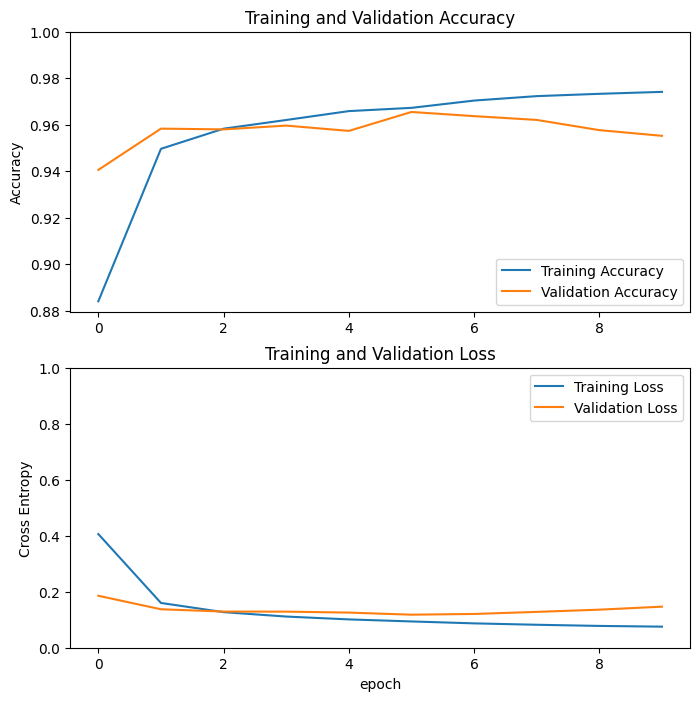

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **🔧 5. Fine-Tuning**

**5.1 Unfreeze Top Layers
Unfroze all layers from the 100th layer onward in MobileNetV2 to allow fine-tuning of the deeper layers.**

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


**5.2 Recompile Model
Recompiled the model after unfreezing the layers to apply changes during training.**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        49,959 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,943 (8.80 MB)

 Trainable params: 1,911,399 (7.29 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset)

Epoch 11/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.8754 - loss: 0.5374 - val_accuracy: 0.5224 - val_loss: 8.5993
Epoch 12/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.9611 - loss: 0.1327 - val_accuracy: 0.6708 - val_loss: 3.9020
Epoch 13/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9666 - loss: 0.1102 - val_accuracy: 0.8770 - val_loss: 1.0064
Epoch 14/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9733 - loss: 0.0883 - val_accuracy: 0.9166 - val_loss: 0.5072
Epoch 15/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9800 - loss: 0.0710 - val_accuracy: 0.8866 - val_loss: 0.9539
Epoch 16/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9824 - loss: 0.0600 - val_accuracy: 0.9461 - val_loss: 0.3523
Epoch 17/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9819 - loss: 0.0568 - val_accuracy: 0.8511 - val_loss: 1.2606
Epoch 18/20
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 

**5.3 Continue Training
Trained the model for an additional 10 epochs (total of 20). Fine-tuning allows the model to learn domain-specific features better.**

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

**5.4 Plot Metrics Plotted the extended training and validation accuracy/loss. A vertical line was drawn on epoch 10 to indicate where fine-tuning started.**

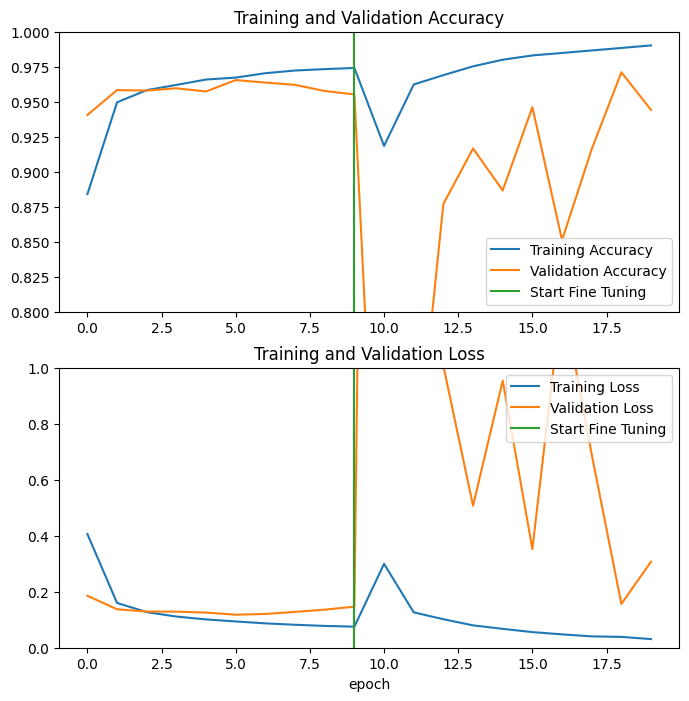

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **📊 6. Model Evaluation**

**6.1 Test Accuracy
Evaluated the final model on the test dataset to report the real-world accuracy of the trained model**

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9477 - loss: 0.2984
Test accuracy : 0.9489299654960632


**6.2 Make Predictions
Predicted labels for test images and displayed them with corresponding class names to verify the model’s performance.**

Predictions:
 [31 23 36 16  3 38 17 14 31  8 24 20 12 30  8 23 12 24 12  3 20 36 31  7
 20 14 30 23 30 24 17 32]
Labels:
 [31 23 36 16  3 38 17 14 31  8 24 20 12 30 10 23 12 13 12  3 20 36 31  7
 20 14 30 23 31 24 17 32]


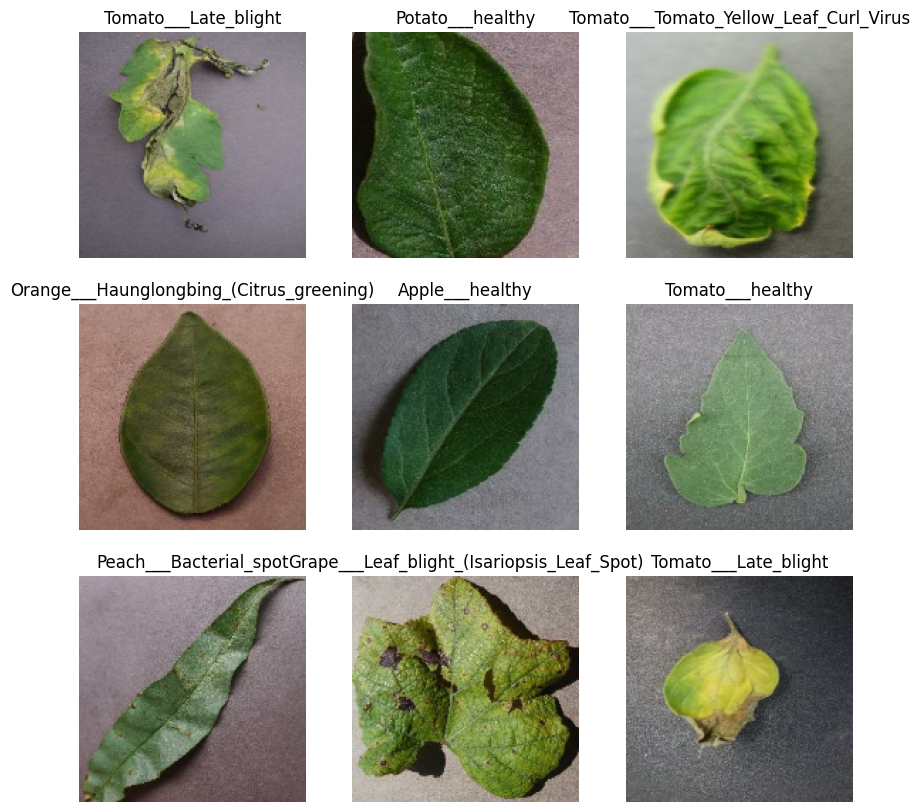

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predictions = tf.argmax(predictions,axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## **💾 7. Saving and Downloading Model**

In [ ]:
model.save("plant_disease_recog_model_pwp.keras")

In [ ]:
model.save("/content/drive/MyDrive/plant_disease_recog_model_pwp.keras")

In [ ]:
model.save("plant_disease_model.keras")


In [ ]:
from google.colab import files
files.download("plant_disease_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>